# Fuji Descent Issue

In [81]:
import numpy as np

csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set prohibition of scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [82]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


### Problem 1: Data Visualization

Text(0.5, 1.0, 'Mt Fuji')

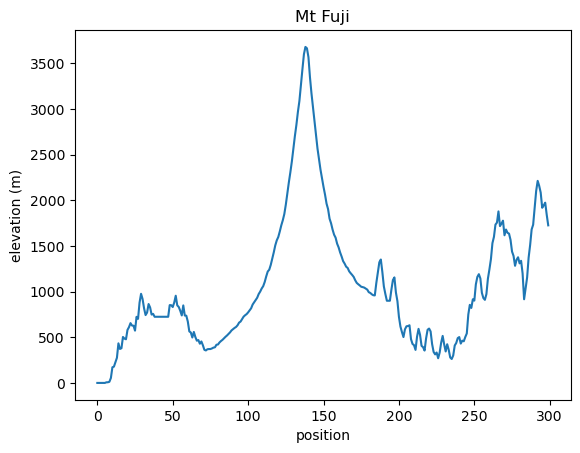

In [83]:
import matplotlib.pyplot as plt

plt.plot(fuji[:,0], fuji[:,3])
plt.xlabel("position")
plt.ylabel("elevation (m)")
plt.title("Mt Fuji")

### Problem2: Create a Function to Calculate the Gradient at a Certain Point

In [84]:
def gradient(current_point):
    x_diff = fuji[:-1, 0] - fuji[1:, 0]
    y_diff = fuji[:-1, 3] - fuji[1:, 3]

    grad = y_diff/x_diff
    current_gradient = grad[current_point-1]
    return current_gradient

point = 147
print(f"The gradient at point {point} is: {gradient(point)}.")



The gradient at point 147 is: -116.36999999999989.


### Problem 3: Create a Function to Calculate the Destination Point

In [128]:
def destination_point(current_point, a=0.2):
   
    current_gradient = gradient(current_point)
    
    # Let a be the hyperparameter value to change
    dest_point = current_point - (a * current_gradient)
    dest_point = round(dest_point)
    
    #Calculate destination gradient taking into account when destination point is negative
    if dest_point <=0 or dest_point >= len(fuji):
        dest_gradient = None
    else:
        dest_gradient = gradient(dest_point)
        
    return dest_point, dest_gradient
    
     
point = 75
print(f"The next point after point {point} is {dest_point} and the gradient is {dest_gradient}")

The next point after point 75 is 75 and the gradient is 0.14999999999997726


### Problem 4: Create a Function to go Down the Mountain

In [133]:
def mountain_descent(a=0.2):
    current_location = 136 
    point_list = []
    point_list.append(current_location)
    
    #Loop to move to next location and add to the list
    while True:
        next_point, next_grad = destination_point(current_location, a=a)
        if next_point == current_location or next_point in point_list or next_point <=0 or next_point >= 300:
            break
        current_location = next_point
        point_list.append(current_location)
        
    return point_list
    
mountain_descent()


[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]

### Problem 5: Visualization of the Descent Process

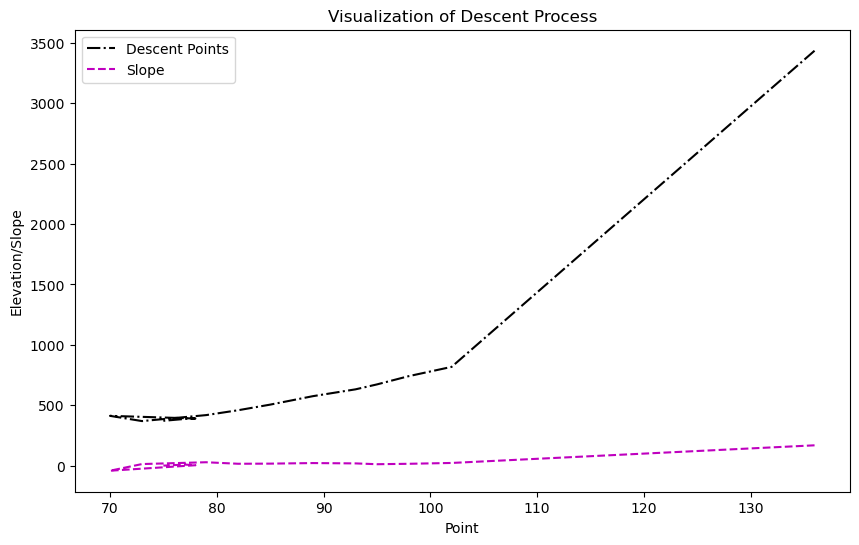

In [134]:
descent = mountain_descent()
elevation = fuji[:, 3]
slope = [gradient(point) for point in descent]

#Plotting the graph
plt.figure(figsize=(10, 6))

#Points moved in cross section as dots
plt.plot(descent, elevation[descent], linestyle="-.", label="Descent Points", color="k")

#Line graph of altitide and slope for each repetition
plt.plot(descent, slope, linestyle="--", label="Slope", color="m")

plt.title("Visualization of Descent Process")
plt.xlabel("Point")
plt.ylabel("Elevation/Slope")
plt.legend()
plt.show()


### Problem 6: Change of Initial Value

In [140]:
def mountain_descent(point, a=0.2):
    current_location = point 
    point_list = []
    point_list.append(current_location)
    
    #Loop to move to next location and add to the list
    while True:
        next_point, next_grad = destination_point(current_location, a=a)
        if next_point == current_location or next_point in point_list or next_point <=0 or next_point >= 300:
            break
        current_location = next_point
        point_list.append(current_location)
        
    return point_list
    
mountain_descent(180)

[180, 186, 164, 169, 173, 176, 177, 178]

### Problem 7: Visualization of the Descent Process for Each Initial Value

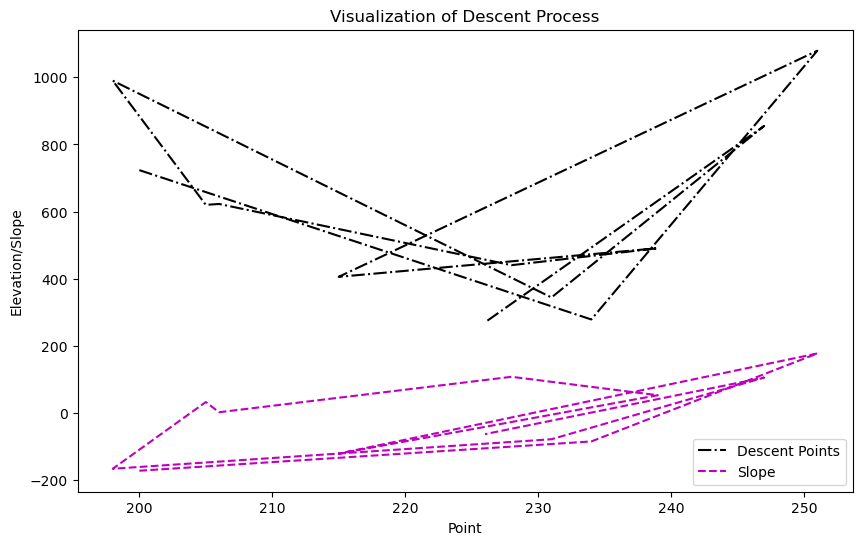

In [143]:
def visualize_descent(point, a=0.2):
    descend_path = mountain_descent(point, a=a)
    
    elevation = fuji[:, 3]
    slope = [gradient(point) for point in descend_path]

    #Plotting the graph
    plt.figure(figsize=(10, 6))

    #Points moved in cross section as dots
    plt.plot(descend_path, elevation[descend_path], linestyle="-.", label="Descent Points", color="k")

    #Line graph of altitide and slope for each repetition
    plt.plot(descend_path, slope, linestyle="--", label="Slope", color="m")

    plt.title("Visualization of Descent Process")
    plt.xlabel("Point")
    plt.ylabel("Elevation/Slope")
    plt.legend()
    plt.show()

visualize_descent(200)

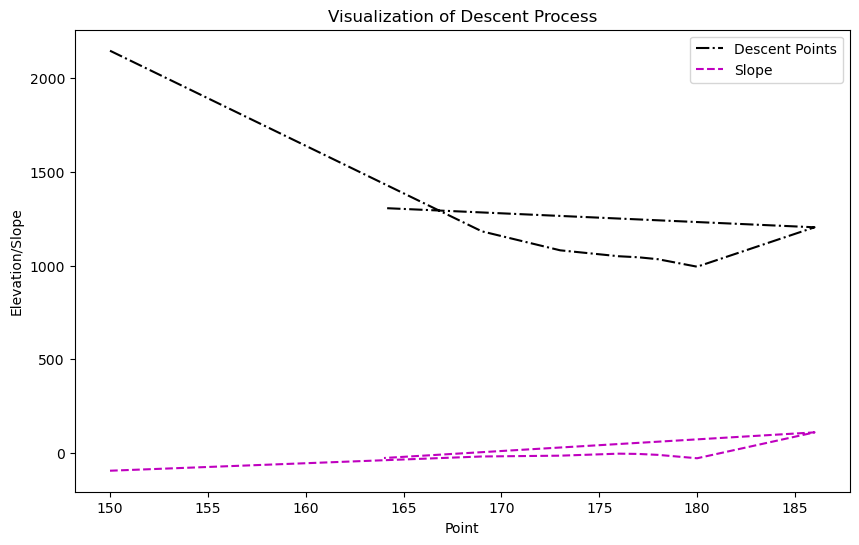

In [144]:
visualize_descent(150)

### Problem 8: Hyperparameter Changes

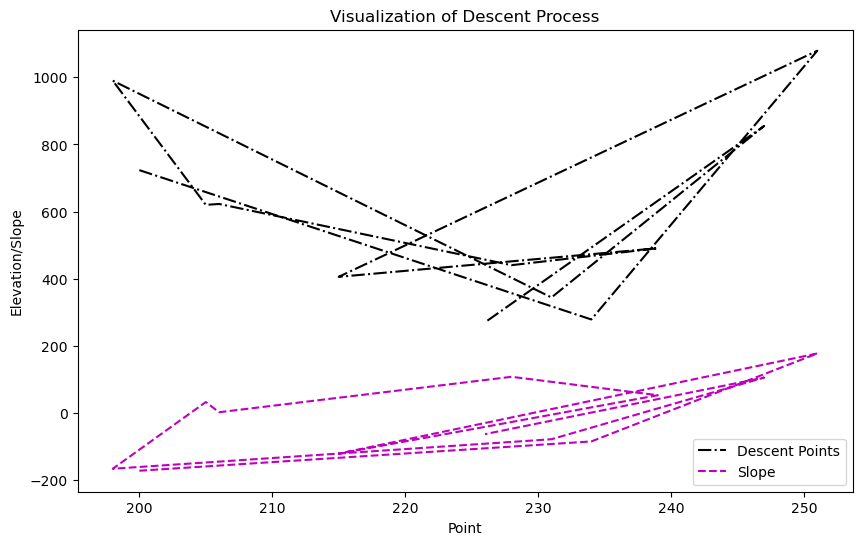

In [145]:
#Descent from point 200 at a=0.2
visualize_descent(200, a=0.2)

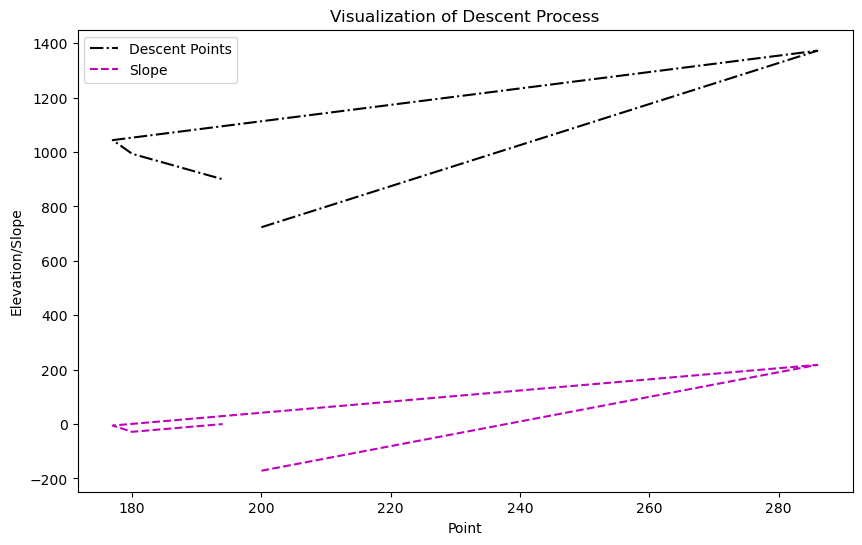

In [146]:
#Descent from point 200 at a=0.5
visualize_descent(200, a=0.5)